In [98]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [99]:
# resolve ssl error
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [100]:
# read in data
df = pd.read_csv('https://raw.githubusercontent.com/hwong019/mban_proj/main/bank-additional-full.csv?token=GHSAT0AAAAAACCN7OMYBFH4ERGMBNRFCJ2WZGFROZQ', sep = ';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

In [101]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# to see how many null values are in each column
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [103]:
# to see the distribution of the target variable
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

/var/folders/9q/dp5y4px56sdfqy2bwgrg78l40000gn/T/ipykernel_19612/1144577242.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

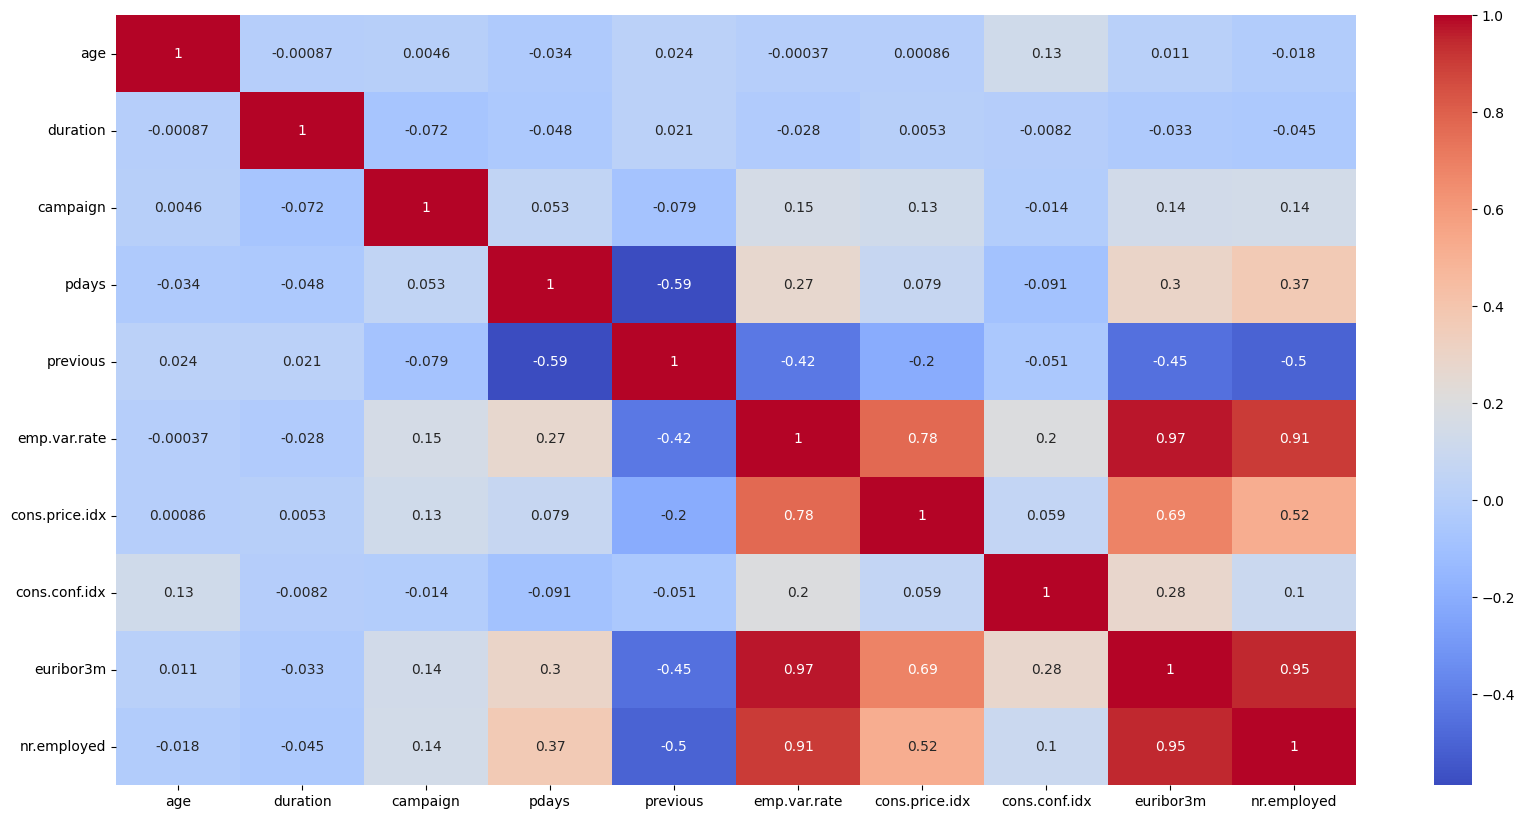

In [104]:
# draw a graph to see the corrlations between variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

/var/folders/9q/dp5y4px56sdfqy2bwgrg78l40000gn/T/ipykernel_19612/370599485.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

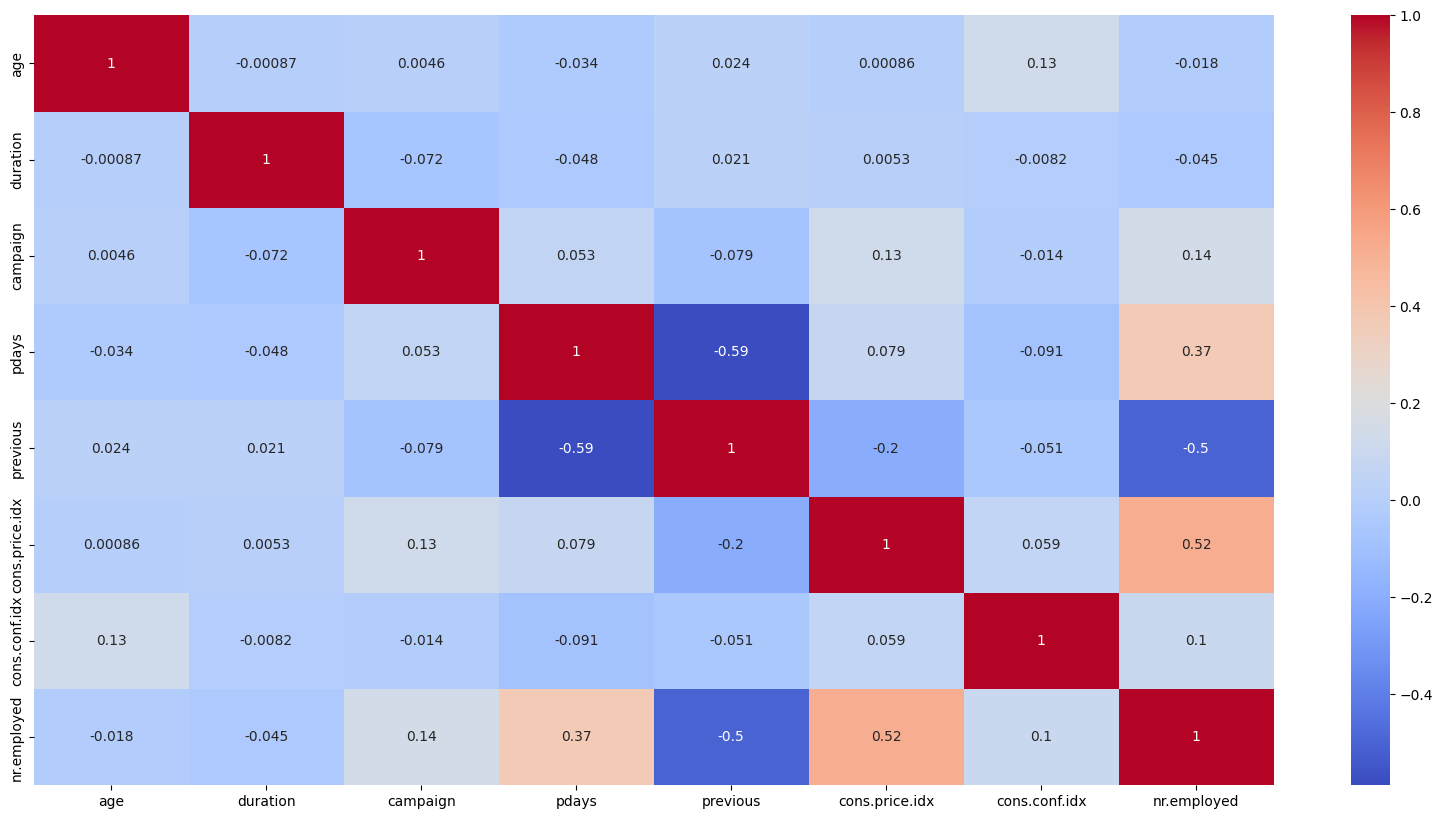

In [105]:
# to drop the highly correlated variables
df = df.drop(['emp.var.rate', 'euribor3m'], axis=1)

# to draw heatmap again to see the correlations between variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [106]:
# check how many 'unknown' values are in each column
df.isin(['unknown']).sum()


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
cons.price.idx       0
cons.conf.idx        0
nr.employed          0
y                    0
dtype: int64

In [107]:
# deal with unknown values

# ignore job, education, and default columns

# drop row with unknown marital
df = df[df['marital'] != 'unknown']

#impute unknown values in housing and loan columns with mode
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])

# check again to see if there are any undesired values
df.isin(['unknown']).sum()


age                  0
job                321
marital              0
education         1722
default           8586
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
cons.price.idx       0
cons.conf.idx        0
nr.employed          0
y                    0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'nr.employed'}>, <Axes: >]], dtype=object)

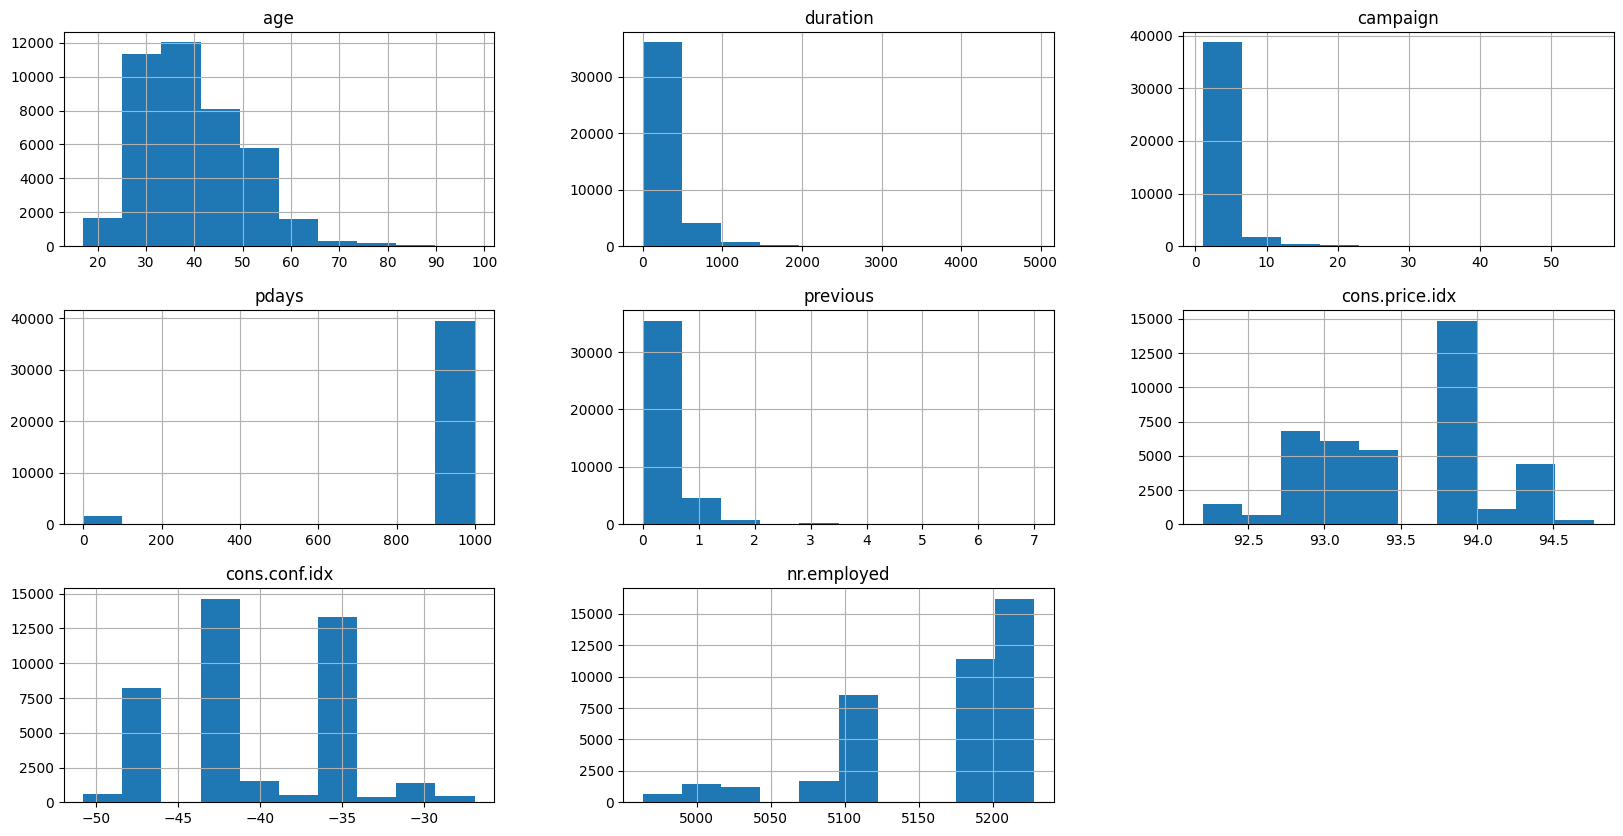

In [108]:
# see distribution for all numeric variables
df.hist(figsize=(20,10))

In [109]:
# change pdays to binary variable
df['pdays'] = df['pdays'].apply(lambda x: 1 if x > 0 else 0)

In [110]:
# change nr.employed to binary variable
df['nr.employed'] = df['nr.employed'].apply(lambda x: 1 if x > 5000 else 0)

In [111]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,1,0,nonexistent,93.994,-36.4,1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,1,0,nonexistent,93.994,-36.4,1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,1,0,nonexistent,93.994,-36.4,1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,1,0,nonexistent,93.994,-36.4,1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,1,0,nonexistent,93.994,-36.4,1,no


In [112]:
# see the datatype for all columns
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
cons.price.idx    float64
cons.conf.idx     float64
nr.employed         int64
y                  object
dtype: object

In [113]:
# change the datatype for pdays to object
df['pdays'] = df['pdays'].astype('object')

In [114]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41108.0,NaN,NaN,NaN,40.023572,10.420661,17.0,32.0,38.0,47.0,98.0
job,41108,12,admin.,10408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41108,3,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41108,8,university.degree,12137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41108,3,no,32519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41108,2,yes,22530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41108,2,no,34872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41108,2,cellular,26091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41108,10,may,13736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41108,5,thu,8599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

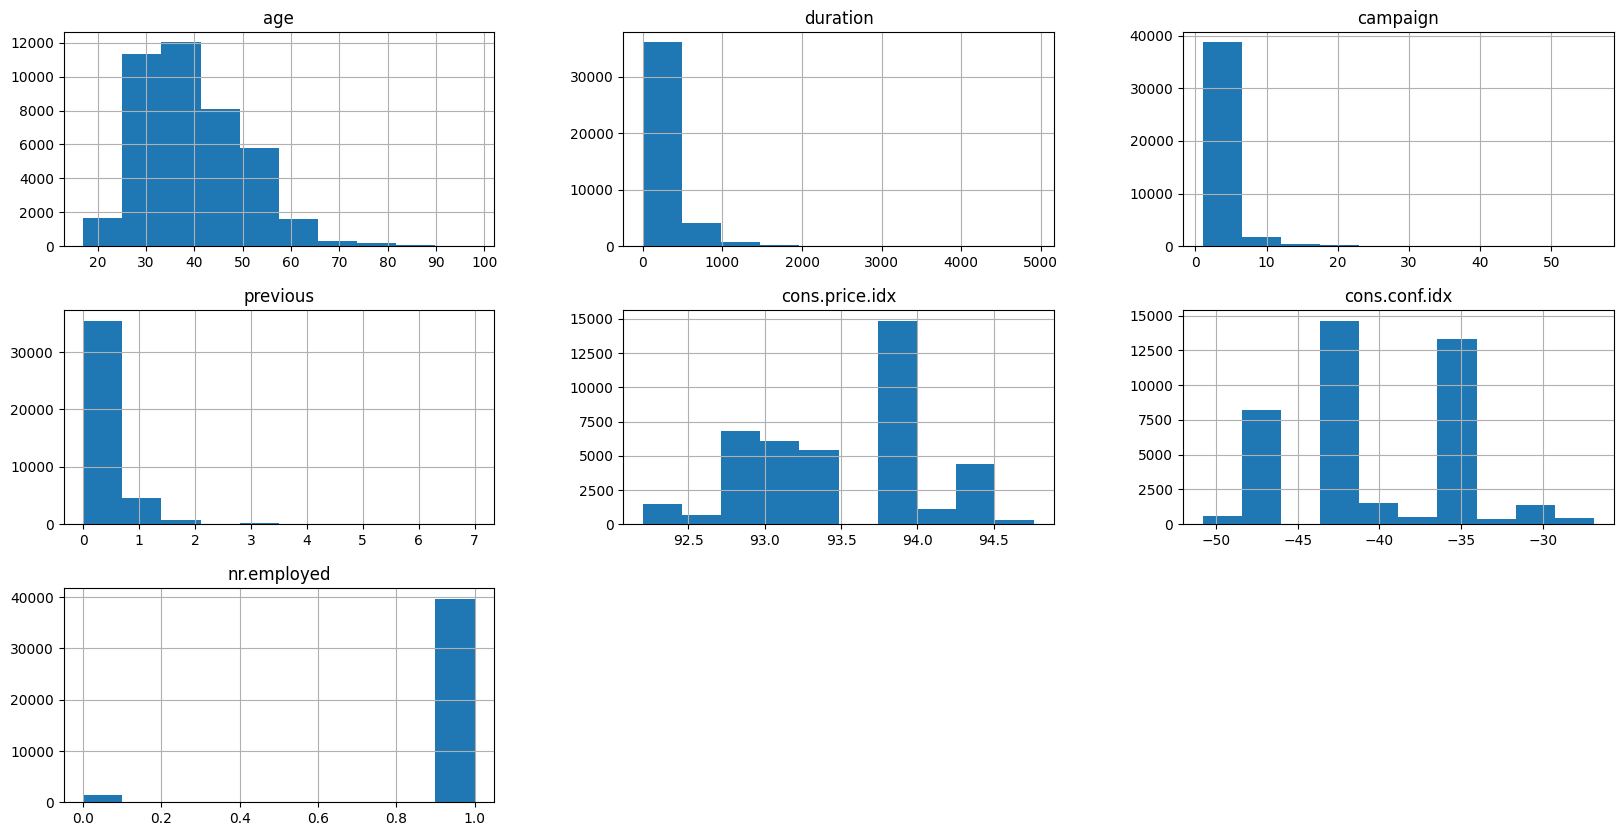

In [115]:
# see distribution for all numeric variables
df.hist(figsize=(20,10))

<Axes: xlabel='campaign'>

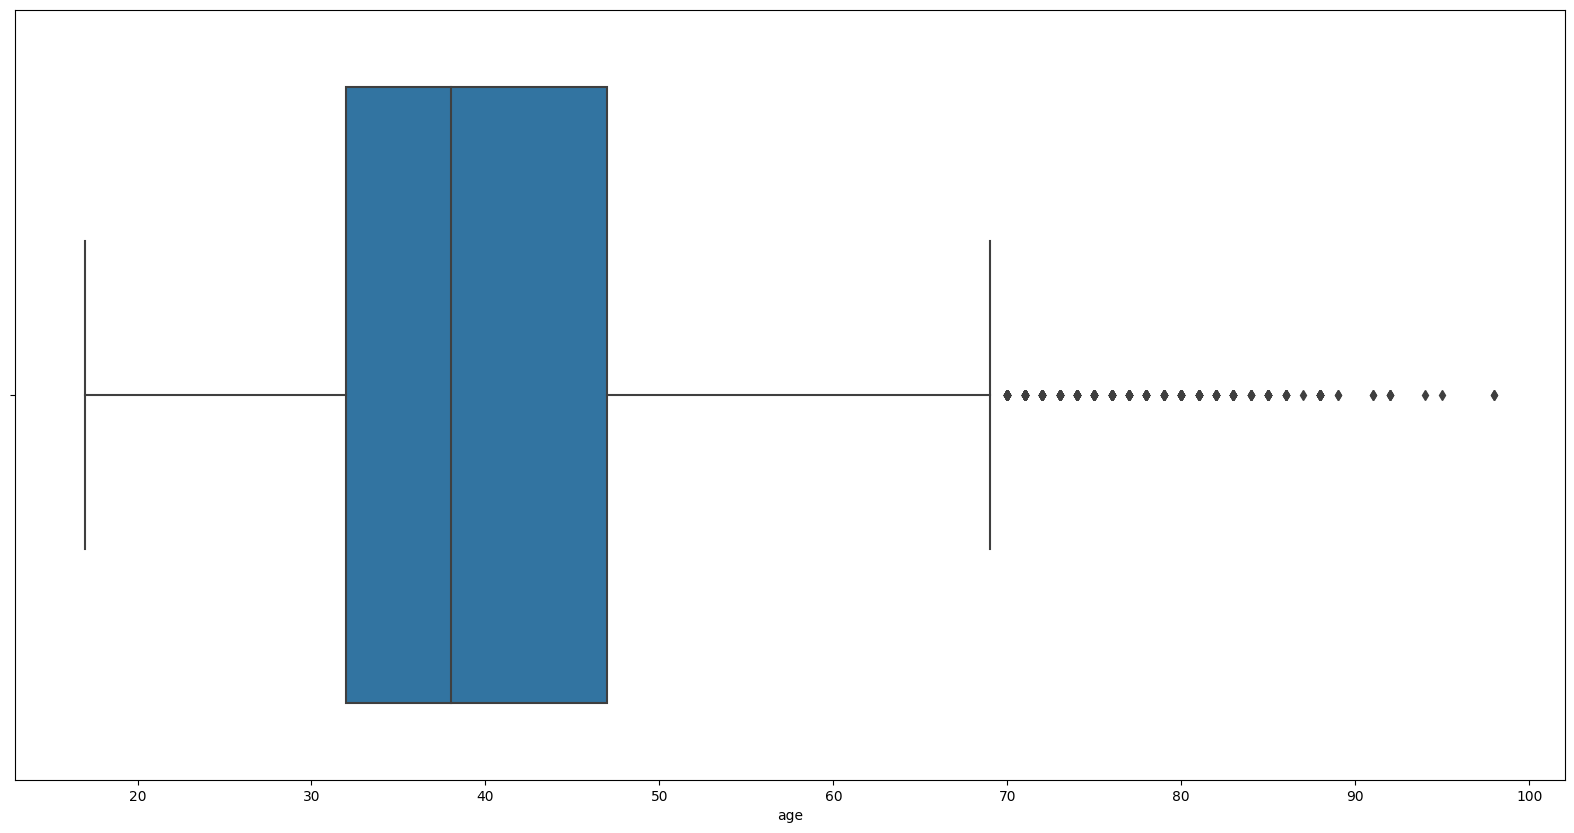

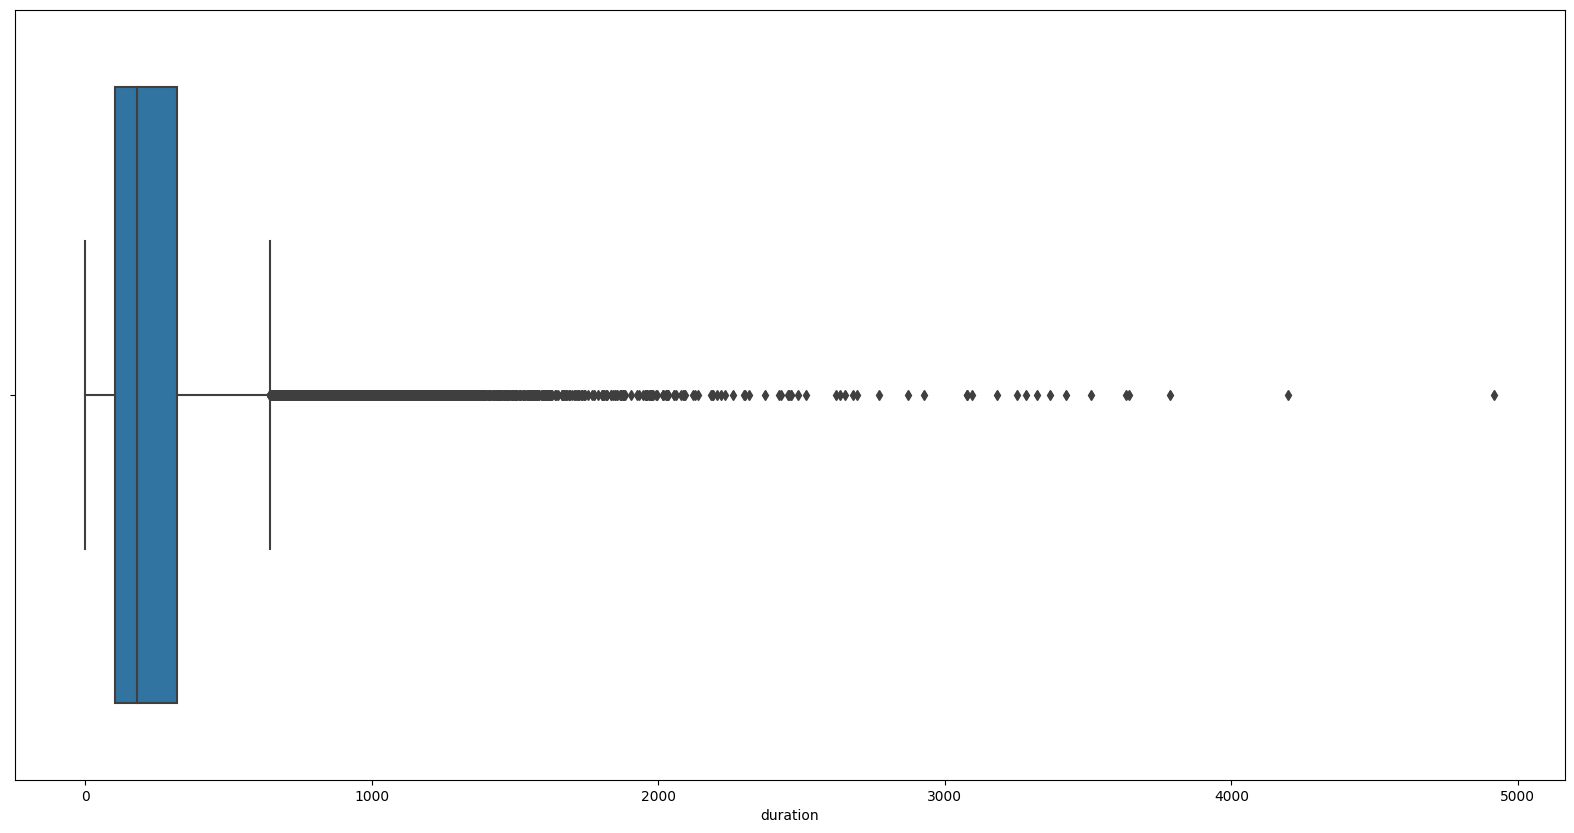

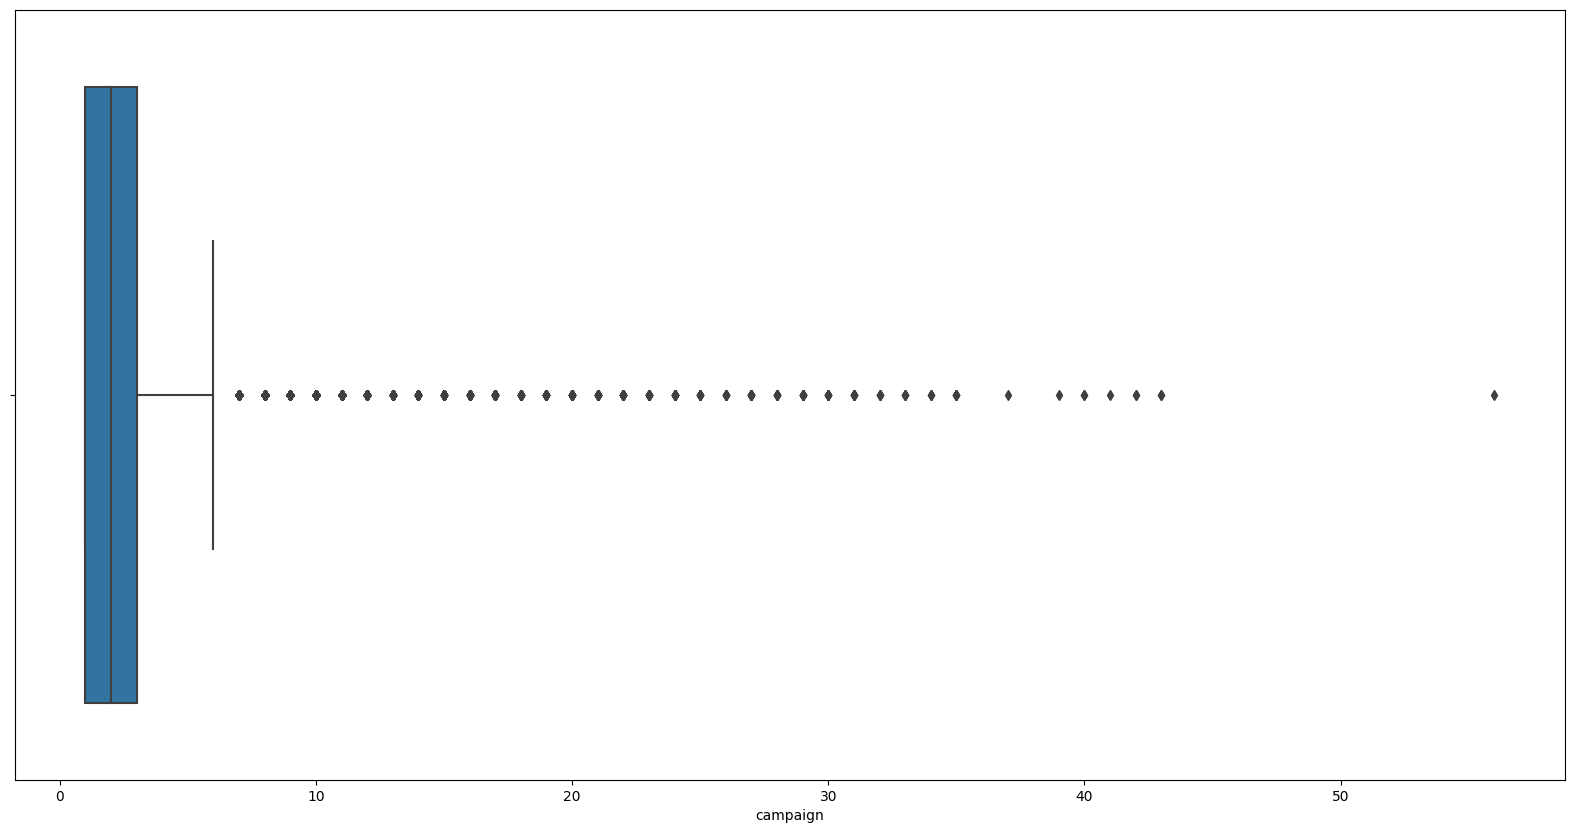

In [116]:
# check outliers for all numeric variables - draw graphs separately
plt.figure(figsize=(20,10))
sns.boxplot(x=df['age'])

plt.figure(figsize=(20,10))
sns.boxplot(x=df['duration'])

plt.figure(figsize=(20,10))
sns.boxplot(x=df['campaign'])


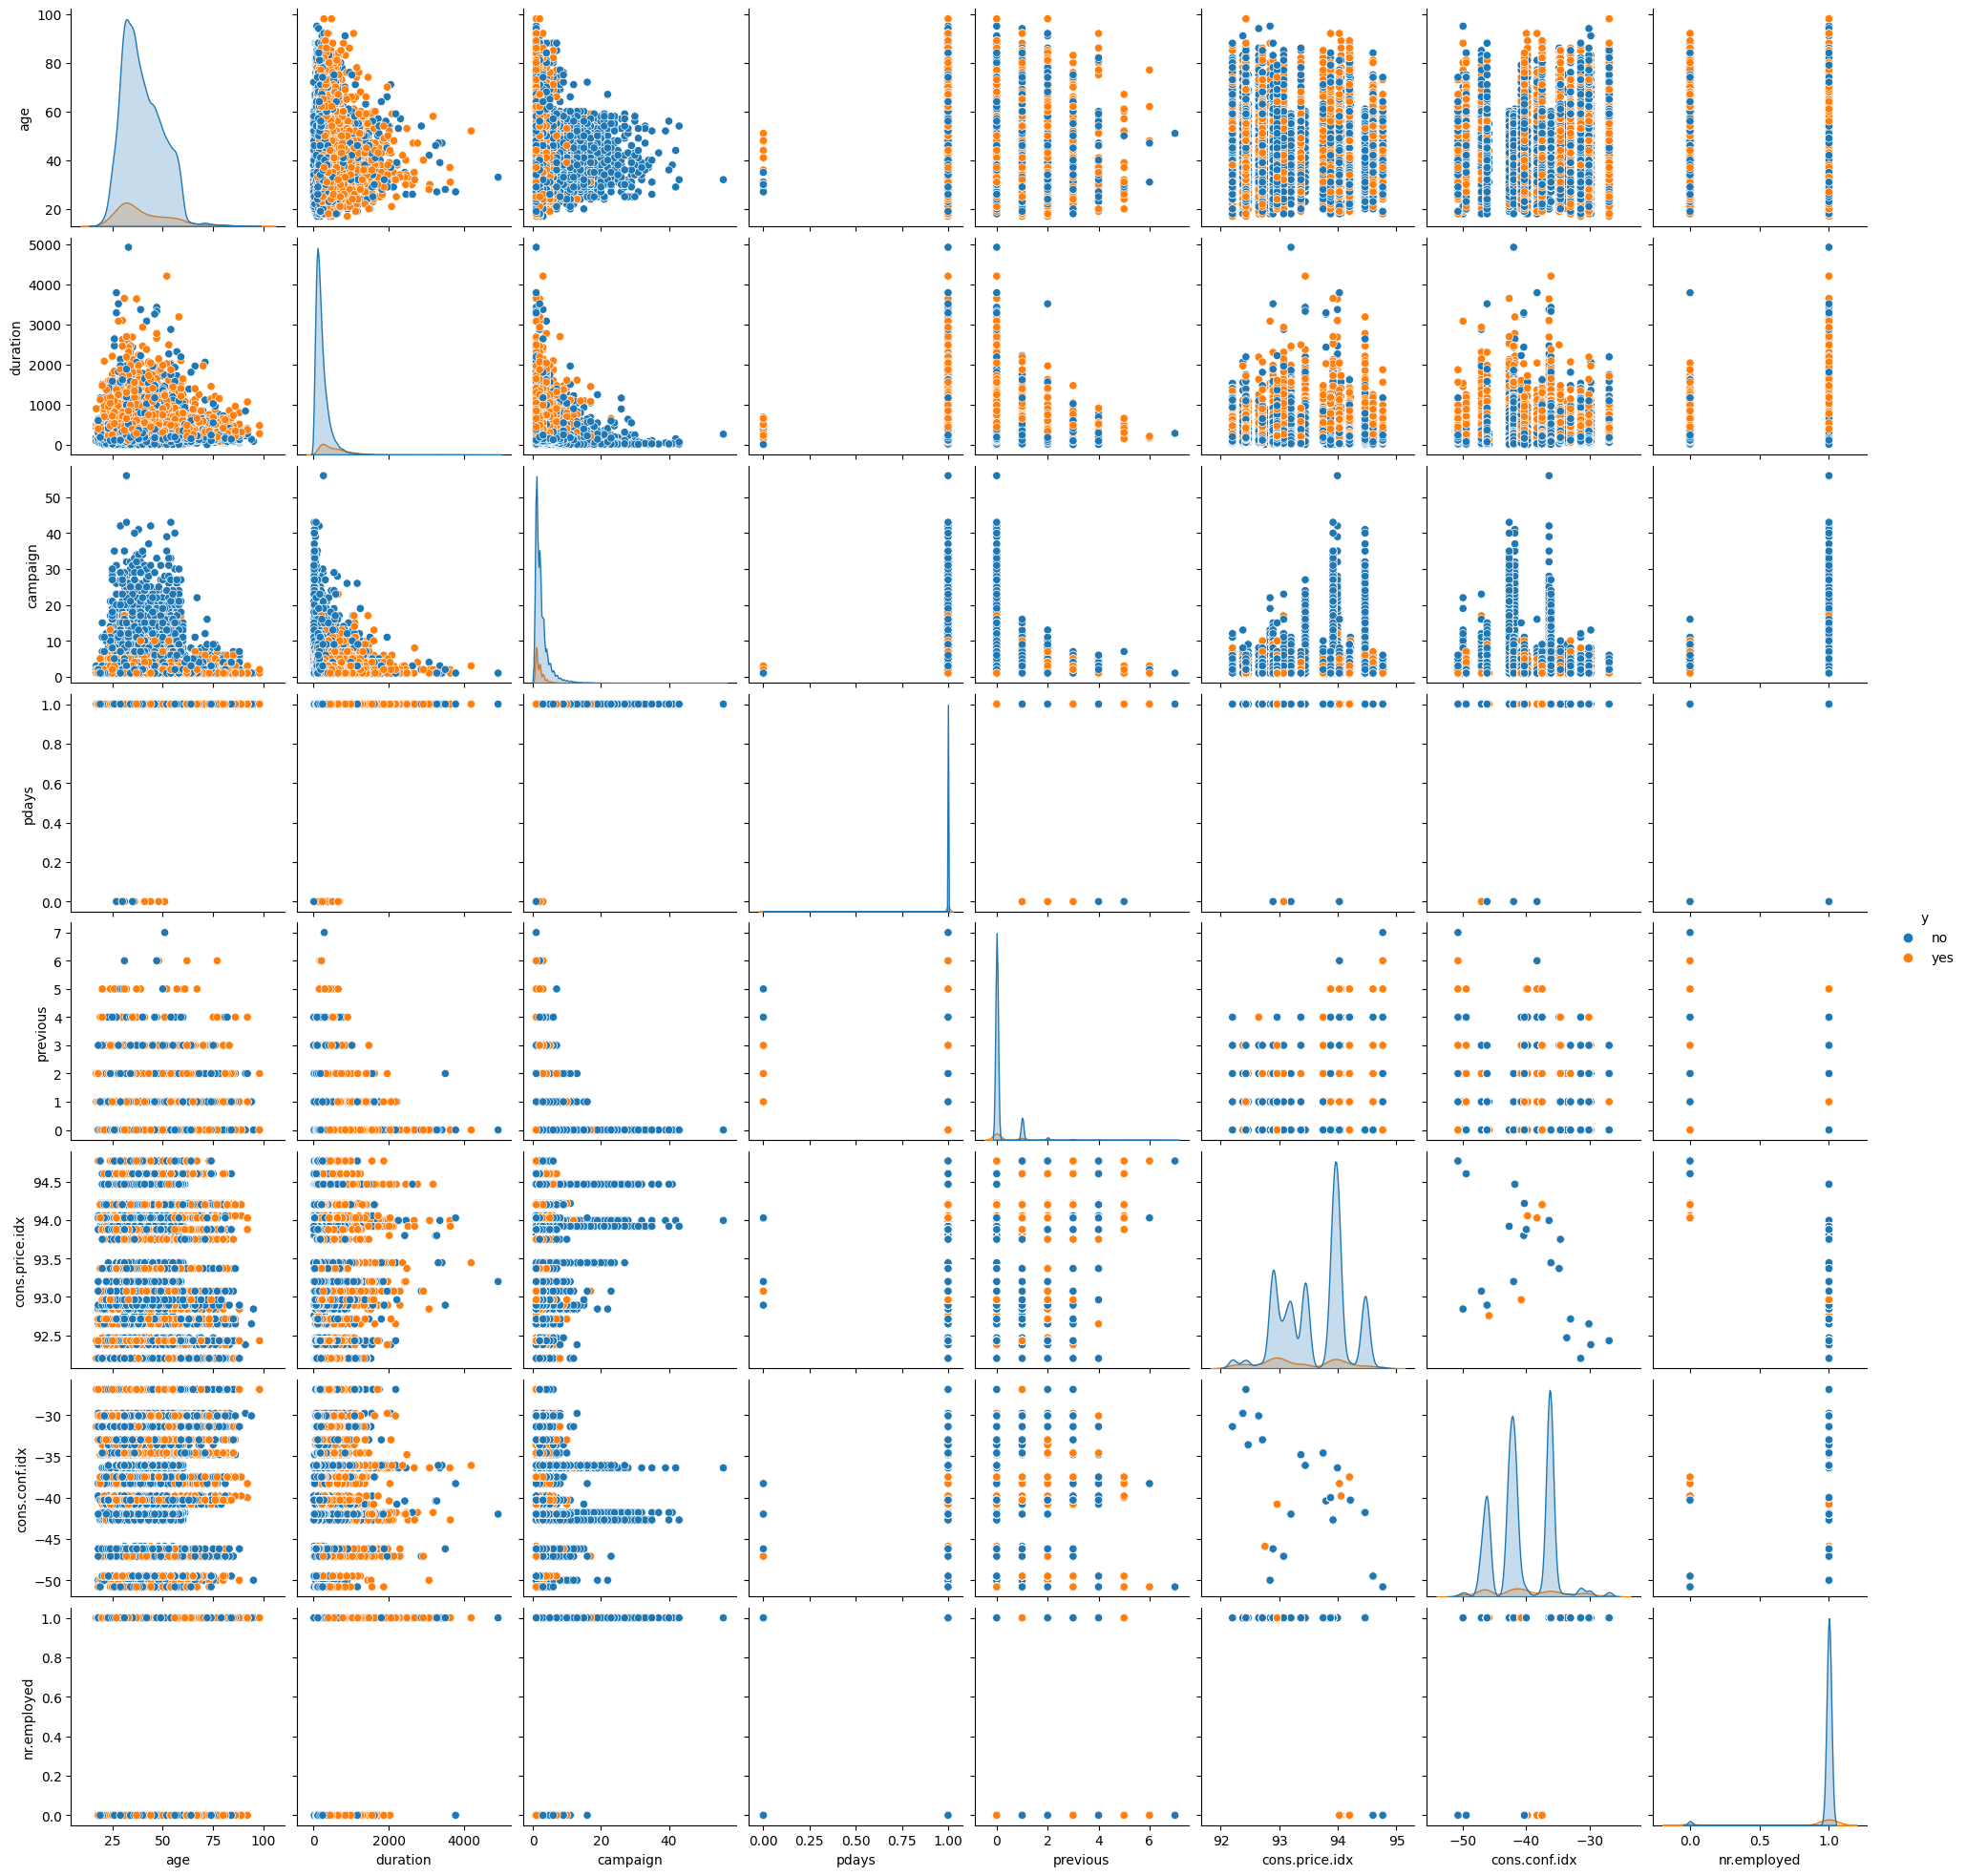

In [117]:
# see the pairplot
sns.pairplot(df, hue='y')
plt.show()

In [118]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'y'],
      dtype='object')

In [120]:
# process data for the model

# change cat_var to dummy variables
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome']
df = pd.get_dummies(df, columns=cat_features)

# scale the numerical variables
num_features = ['age', 'campaign', 'cons.price.idx', 'cons.conf.idx']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# change y to 0,1
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)


In [130]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# concatenate categorical and numerical features into a single dataframe
X = df.drop('y', axis=1)

# split data into training and testing sets
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [132]:
# to train the model - KNN
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_test = np.ascontiguousarray(X_test)
y_test = np.ascontiguousarray(y_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [133]:
# to see the f1 score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8889969999189167
Precision: 0.5239567233384853
Recall: 0.24214285714285713
F1 Score: 0.3312164142647777


In [134]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10933
           1       0.52      0.24      0.33      1400

    accuracy                           0.89     12333
   macro avg       0.72      0.61      0.64     12333
weighted avg       0.87      0.89      0.87     12333

